# Assignment

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
  - Anomaly Detection is a data analysis technique used to identify unusual
patterns or observations that significantly differ from normal behavior.
It is commonly used in fraud detection, network security, and fault detection.

  - Types of Anomalies:
1. Point Anomaly: A single data point that is abnormal.
   Example: A ₹1,00,000 transaction in a low-activity bank account.

2. Contextual Anomaly: A data point that is abnormal in a specific context.
   Example: High electricity usage at midnight.

3. Collective Anomaly: A group of data points that together are abnormal.
   Example: Multiple failed login attempts indicating a cyberattack.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
  - Isolation Forest:
    - Approach: Tree-based algorithm that isolates anomalies by randomly splitting data, anomalies require fewer splits to isolate.
    - Use Case: Works well for high-dimensional data like fraud detection     and large datasets.

  - DBSCAN:
    - Approach: Density-based clustering algorithm that marks low-density     points as noise (anomalies).
    - Use Case: Suitable for spatial data, arbitrary-shaped clusters, and     when noise detection is important.

  - Local Outlier Factor (LOF):
    - Approach: Density-based method that compares local density of a point     with its neighbors; lower density points are anomalies.
    - Use Case: Effective when anomalies are defined relative to local     neighborhoods, such as intrusion detection.

Question 3: What are the key components of a Time Series? Explain each with one
example.
  - Key Components of a Time Series:

1. Trend: The long-term upward or downward movement in data over time.
   - Example: Increasing online sales of a company over several years.

2. Seasonality: Regular and repeating short-term patterns within fixed time   periods.
   - Example: Higher ice cream sales during summer every year.

3. Cyclical Component: Long-term fluctuations that occur but not at fixed intervals.
   - Example: Economic growth and recession cycles.

4. Irregular (Random) Component: Unpredictable and random variations in the data.
   - Example: Sudden drop in sales due to a natural disaster.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- Stationary in Time Series:

A time series is called stationary if its statistical properties (mean, variance, and autocorrelation) remain constant over time. It does not show trend or seasonality.

- Testing Stationarity:
1. Visual inspection (check for trend/seasonality in plot)
2. Augmented Dickey-Fuller (ADF) Test
3. KPSS Test

Transforming Non-Stationary to Stationary:
1. Differencing (subtract previous value)
2. Log or power transformation (to stabilize variance)
3. Removing trend or seasonal components (decomposition)

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
  - AR (AutoRegressive):
    - Structure: Current value depends on its past values (Yt = c + φ1Yt-1 + ...).
    - Application: Used when data shows correlation with previous observations.

  - MA (Moving Average):
    - Structure: Current value depends on past error terms.
    - Application: Suitable when random shocks influence the series.

  - ARIMA (AutoRegressive Integrated Moving Average):
    - Structure: Combines AR + Differencing (I) + MA.
    - Application: Used for non-stationary time series after making them stationary.

  - SARIMA (Seasonal ARIMA):
    - Structure: ARIMA + seasonal components (P, D, Q, m).
    - Application: Used for time series with seasonal patterns.

  - SARIMAX (Seasonal ARIMA with Exogenous variables):
    - Structure: SARIMA + external independent variables (X).
    - Application: Used when external factors (e.g., temperature, promotion) affect the series.

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

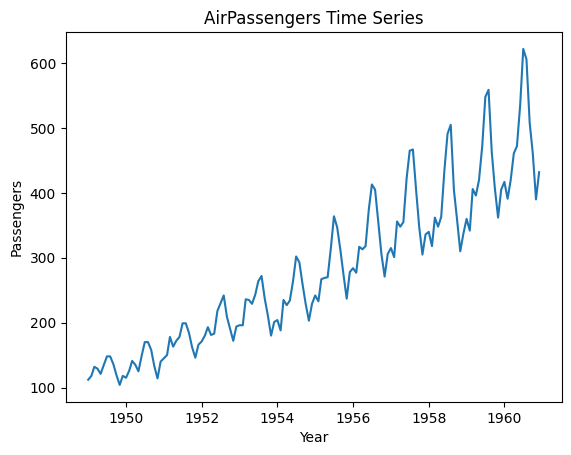

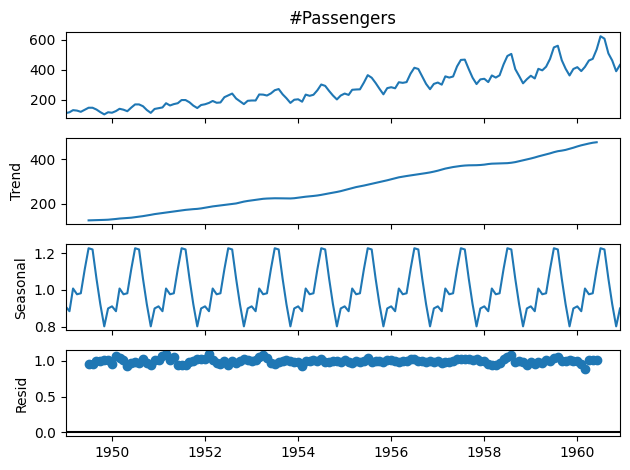

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers CSV file
data = pd.read_csv("AirPassengers.csv")

# Convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set Month as index
data.set_index('Month', inplace=True)

# Rename column if needed (example: Passengers)
ts = data.iloc[:, 0]

# Plot original time series
plt.figure()
plt.plot(ts)
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

# Decompose the series
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)

# Plot trend, seasonality, residual
decomposition.plot()
plt.show()

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

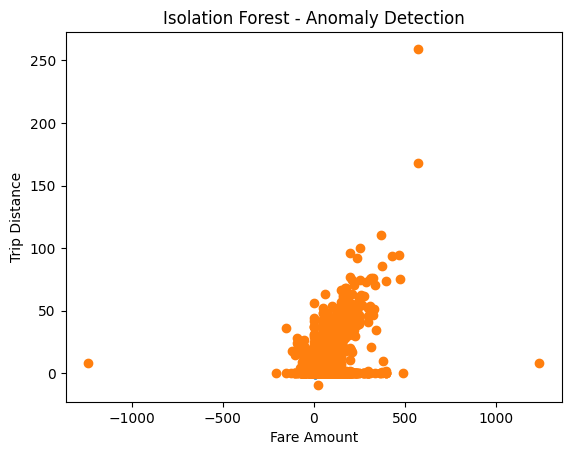

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load dataset
data = pd.read_csv("NYC_taxi_fare_data.csv")

# Select numerical features
features = data[['fare_amount', 'trip_distance']]

# Remove missing values
features = features.dropna()

# Apply Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
features['anomaly'] = model.fit_predict(features)

# Separate normal and anomalies
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# Plot 2D scatter
plt.figure()
plt.scatter(normal['fare_amount'], normal['trip_distance'])
plt.scatter(anomaly['fare_amount'], anomaly['trip_distance'])
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.title("Isolation Forest - Anomaly Detection")
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


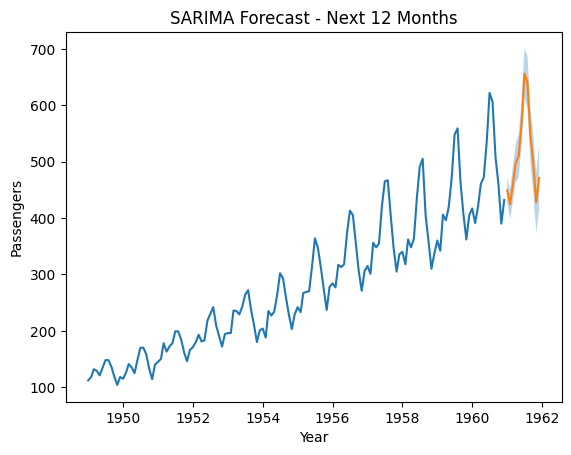

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load AirPassengers dataset (CSV file)
data = pd.read_csv("AirPassengers.csv")

# Convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Select passenger column
ts = data.iloc[:, 0]

# Train SARIMA model (example parameters)
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot original + forecast
plt.figure()
plt.plot(ts)
plt.plot(forecast_values)
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 alpha=0.3)

plt.title("SARIMA Forecast - Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

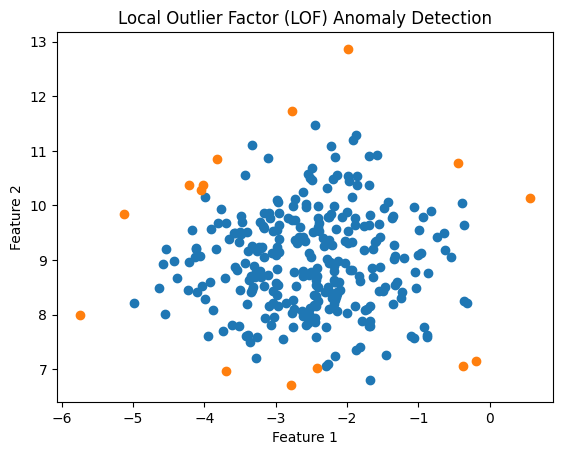

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate a sample numerical dataset
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)

# Separate normal points and anomalies
normal = X[labels == 1]
anomaly = X[labels == -1]

# Visualize using matplotlib
plt.figure()
plt.scatter(normal[:, 0], normal[:, 1])
plt.scatter(anomaly[:, 0], anomaly[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
- How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
- Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
- How would you validate and monitor the performance over time?
- How would this solution help business decisions or operations?


  - Real-Time Data Science Workflow for Power Grid Monitoring

1) Anomaly Detection (Streaming Data):
I would use Isolation Forest for real-time anomaly detection because it is
computationally efficient and works well with high-dimensional data.
The model can be trained on historical normal consumption patterns and
then applied to 15-minute streaming data to detect abnormal spikes/drops.
For region-wise local density anomalies, LOF can also be applied offline.

2) Short-Term Forecasting Model:
I would use SARIMAX because energy demand has seasonality (daily/weekly)
and is influenced by exogenous variables like temperature and weather.
SARIMAX captures trend + seasonality + external factors, making it suitable
for 15-minute short-term load forecasting.

3) Validation & Performance Monitoring:
Use rolling/expanding window cross-validation for time series.
Evaluate using MAE, RMSE, and MAPE.
Continuously monitor prediction error drift and anomaly rate; retrain the
model periodically if performance degrades.

4) Business Impact:
Early anomaly detection helps prevent grid failures and overloads.
Accurate forecasting supports load balancing, energy purchasing decisions,
and optimal power distribution, reducing operational costs and improving
grid reliability.